# Data Exploration

In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
import warnings

## Data Loading

In [2]:
# Ignore warnings
warnings.filterwarnings("ignore")

# Load data
gamesdata = pd.read_csv('gamesdata.csv', index_col=0)
mergeddata = pd.read_csv('mergeddata.csv', index_col=0)
numgames = pd.read_csv('numgames.csv', index_col=0)

## Exploration

We will proceed to perform explorations based on the different categories found in the datasets, providing insightful visuals such as the use of graphs. All this with the goal of receiving valuable information that could help us deliver the best recommendations possible.

In [15]:
# Count unique game and user ids
unique_game_ids = mergeddata['id'].nunique()
unique_game_ids

7782

In [16]:
unique_user_ids = mergeddata['uid'].nunique()
unique_user_ids

4391

## 1) Release Date

First we load the the gamesdata df

In [25]:
# Filter for non-null release date and describe release date feature
data = gamesdata[gamesdata['release_date'].notnull()]
release_date_desc = data['release_date'].describe()

In [26]:
# Clean release date strings and convert to DateTime
def format_release_date(date_str):
    if date_str[-3] != '-':
        return None
    return date_str

data['release_date'] = data['release_date'].apply(format_release_date)
data = data[data['release_date'].notnull()]
data['release_date'] = pd.to_datetime(data['release_date'])

In [27]:
# Check 
data['release_date'].describe()

count                   29783
unique                   3457
top       2012-10-16 00:00:00
freq                      100
first     1970-07-15 00:00:00
last      2021-12-31 00:00:00
Name: release_date, dtype: object

Releases range all the way from 1970 to 2021.

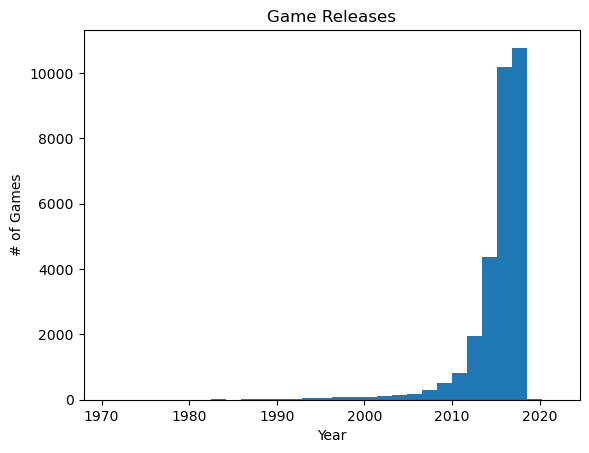

In [28]:
# Plot histogram of release date for all games
plt.hist(data['release_date'], bins=30)
plt.title('Game Releases')
plt.ylabel('# of Games')
plt.xlabel('Year')
plt.show()

Most releases are after 2010, so we will take a closer look.

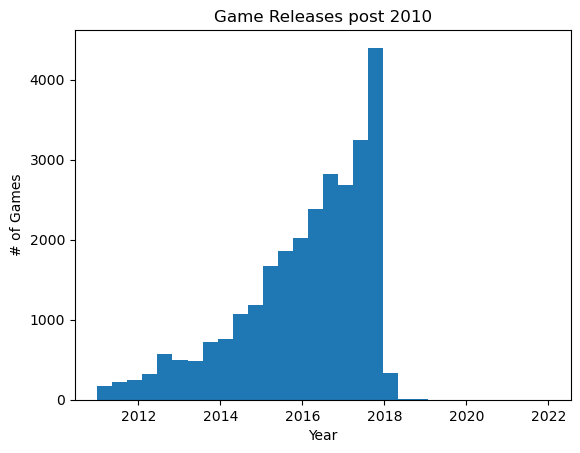

In [30]:
# Filter for games released after 2010 and plot histogram of release date
recentgames = data[data['release_date'].dt.year > 2010]
plt.hist(recentgames['release_date'], bins=30)
plt.title('Game Releases post 2010')
plt.ylabel('# of Games')
plt.xlabel('Year')
plt.show()

It could be useful to deepen this and take a look at which are the most popular months

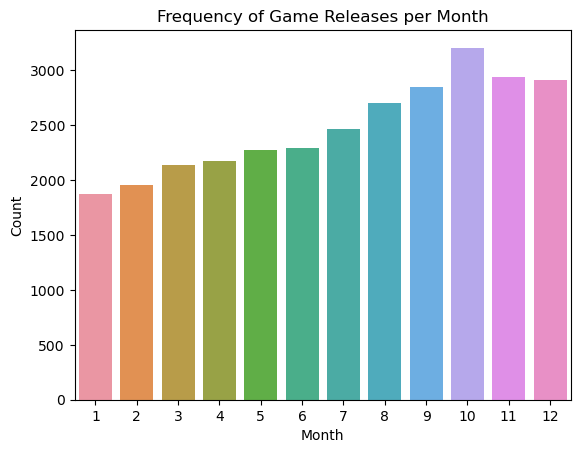

In [31]:
# Create month feature and plot countplot using Seaborn
data['release_month'] = pd.DatetimeIndex(data['release_date']).month
sns.countplot(x=data['release_month'])
plt.title('Frequency of Game Releases per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

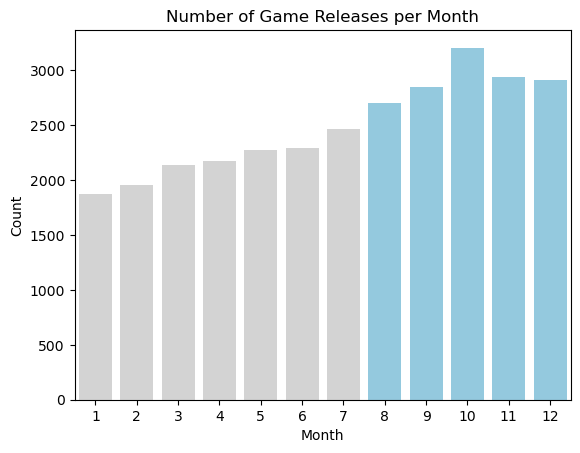

In [32]:
custompalette = {month: "skyblue" if (month == 8 or month == 9 or month == 10 or month == 11 or month == 12) else "lightgrey" for month in data['release_month'].unique()}
sns.countplot(x=data['release_month'], palette=custompalette)
plt.title('Number of Game Releases per Month')
plt.xlabel('Month')
plt.ylabel('Count')

We have identified the 5 most popular months to release games, now we can also take a look at yearly quarters

In [33]:
# Define function to determine quarter and create quarter feature
def quarter(month):
    if 1 <= month <= 3:
        quarter = 'Q1'
    elif 4 <= month <= 6:
        quarter = 'Q2'
    elif 7 <= month <= 9:
        quarter = 'Q3'
    else:
        quarter = 'Q4'
    return quarter
data['release_quarter'] = data['release_month'].apply(quarter)

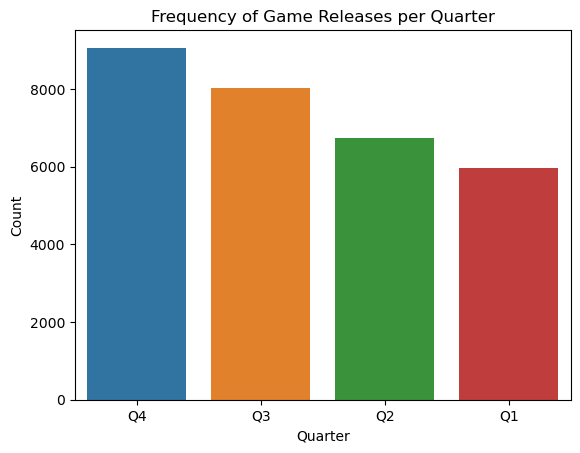

In [34]:
# Plot countplot of game releases per quarter
sns.countplot(x=data['release_quarter'], order=data['release_quarter'].value_counts().index)
plt.title('Frequency of Game Releases per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.show()

Based on the shown exploration of the "Release Date" column, we have established the most popular months and quarters to release video games. With this in mind, we could create recommendations of when is the best time to buy the recommended video game that the engine will output.

## 2) Game Library Size

In [22]:
# View head
numgames.head()

,user_id,items_count
0,76561197970982479,277
1,js41637,888
2,evcentric,137
3,Riot-Punch,328
4,doctr,541


In [23]:
numgames['items_count'].describe()

count    5000.000000
mean       97.462000
std       195.681445
min         0.000000
25%        26.000000
50%        63.000000
75%       120.000000
max      7762.000000
Name: items_count, dtype: float64

We have data for 5000 unique steam users. Minimum number of games owned is 0 and the maximum is 7762. The average number of games owned is 97.

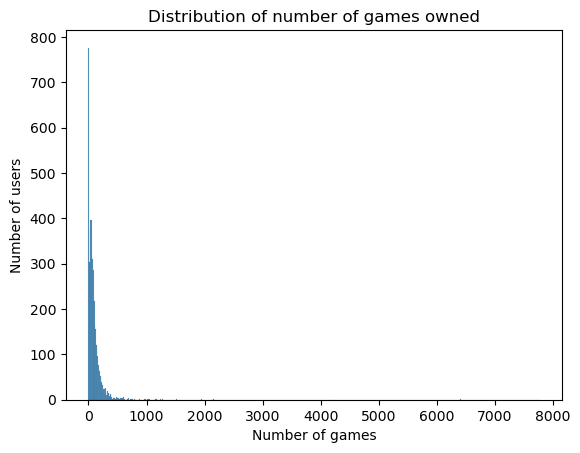

In [35]:
# Plot distribution
sns.histplot(numgames['items_count'])
plt.title('Distribution of number of games owned')
plt.xlabel('Number of games')
plt.ylabel('Number of users')
plt.show()

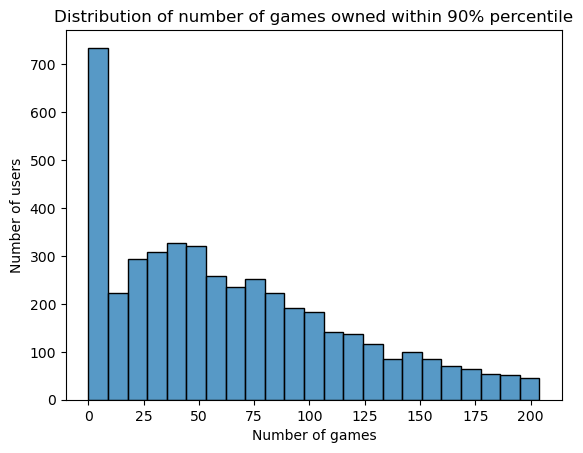

In [36]:
# Filter `numgames` by items_count within 90% percentile
filtered_numgames = numgames[numgames['items_count'] < numgames['items_count'].quantile(0.90)]

# Plot distribution of `items_count` within 90% percentile
sns.histplot(filtered_numgames['items_count'])
plt.title('Distribution of number of games owned within 90% percentile')
plt.xlabel('Number of games')
plt.ylabel('Number of users')
plt.show()

With the analysis of the game library size, we can focus on the users who show to have a number of games below the given average.

## 3) Game Price

In [37]:
gamesprice = gamesdata.copy()
gamesprice['price'].describe()

count     30758
unique      162
top        4.99
freq       4278
Name: price, dtype: object

In [38]:
# Values are of type object, still working on performing this analysis

## 4) Game Genre

In [39]:
gamegenres = gamesdata.copy()
gamegenres = gamegenres[gamegenres['genres'].notnull()]

# Get unique lists
genres = list(gamegenres['genres'].unique())

# View first 5
genres[:5]

["['Action', 'Casual', 'Indie', 'Simulation', 'Strategy']",
 "['Free to Play', 'Indie', 'RPG', 'Strategy']",
 "['Casual', 'Free to Play', 'Indie', 'Simulation', 'Sports']",
 "['Action', 'Adventure', 'Casual']",
 "['Action', 'Adventure', 'Simulation']"]

In [40]:
# Combine all strings
allgenres = ','.join(genres)

# Replace chars
allgenres = allgenres.replace("[","").replace("]", "").replace("'", "").replace(" ","")

# Split
splitgenres = allgenres.split(',')

# Use set to obtain unique values
uniquegenres = set(splitgenres)
uniquegenres

{'Accounting',
 'Action',
 'Adventure',
 'Animation&amp;Modeling',
 'AudioProduction',
 'Casual',
 'Design&amp;Illustration',
 'EarlyAccess',
 'Education',
 'FreetoPlay',
 'Indie',
 'MassivelyMultiplayer',
 'PhotoEditing',
 'RPG',
 'Racing',
 'Simulation',
 'SoftwareTraining',
 'Sports',
 'Strategy',
 'Utilities',
 'VideoProduction',
 'WebPublishing'}

In [42]:
# Create columns with genres
for genre in uniquegenres:
    gamegenres[genre] = 0
    
# Split genres in genres column
gamegenres['genres'] = gamegenres['genres'].map(lambda x : x.replace("["," ").replace("]", "").replace("'", "").replace(" ","").split(','))

# Map to columns - set to 1 if genre applies
for index, genres in enumerate(gamegenres['genres']):
    for genre in genres:
        gamegenres.loc[index,genre] = 1

gamegenres.head(2)  


,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,...,EarlyAccess,Casual,MassivelyMultiplayer,Indie,Simulation,SoftwareTraining,Animation&amp;Modeling,Utilities,RPG,Design&amp;Illustration
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,"Making Fun, Inc.","[FreetoPlay, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
gamegenres.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'discount_price', 'reviews_url', 'specs', 'price',
       'early_access', 'id', 'developer', 'sentiment', 'metascore',
       'AudioProduction', 'Strategy', 'PhotoEditing', 'FreetoPlay',
       'Education', 'Racing', 'Accounting', 'Action', 'Sports', 'Adventure',
       'VideoProduction', 'WebPublishing', 'EarlyAccess', 'Casual',
       'MassivelyMultiplayer', 'Indie', 'Simulation', 'SoftwareTraining',
       'Animation&amp;Modeling', 'Utilities', 'RPG',
       'Design&amp;Illustration'],
      dtype='object')

## 5) Game Tags

In [53]:
gametags = gamesdata.copy()
gametags = gamegenres[gamegenres['tags'].notnull()]
tags = list(gametags['tags'].unique())
tags[:5]

["['Strategy', 'Action', 'Indie', 'Casual', 'Simulation']",
 "['Free to Play', 'Strategy', 'Indie', 'RPG', 'Card Game', 'Trading Card Game', 'Turn-Based', 'Fantasy', 'Tactical', 'Dark Fantasy', 'Board Game', 'PvP', '2D', 'Competitive', 'Replay Value', 'Character Customization', 'Female Protagonist', 'Difficult', 'Design & Illustration']",
 "['Free to Play', 'Simulation', 'Sports', 'Casual', 'Indie', 'Multiplayer']",
 "['Action', 'Adventure', 'Casual']",
 "['Action', 'Adventure', 'Simulation', 'FPS', 'Shooter', 'Third-Person Shooter', 'Sniper', 'Third Person']"]

In [54]:
# Combine all strings
alltags = ','.join(tags)

# Replace chars
alltags = alltags.replace("["," ").replace("]", "").replace("'", "")

# Split
splittags = alltags[1:].split(',')

# Use set to obtain unique values
uniquetags = set(splittags)
len(uniquetags)

337

## 6) Game Publisher

In [57]:
data = gamesdata[gamesdata['publisher'].notnull()]

# Create dictionary
game_publishers = defaultdict(int)
for publisher in data['publisher']:
    game_publishers[publisher] += 1

In [58]:
# Get top 10 publishers
top10_publishers = dict(Counter(game_publishers).most_common(10))
top10_publishers

{'Ubisoft': 385,
 'Dovetail Games - Trains': 360,
 'Degica': 286,
 'Paradox Interactive': 271,
 'SEGA': 251,
 'Dovetail Games - Flight': 220,
 'KOEI TECMO GAMES CO., LTD.': 208,
 'Activision': 202,
 'Big Fish Games': 195,
 'KISS ltd': 189}

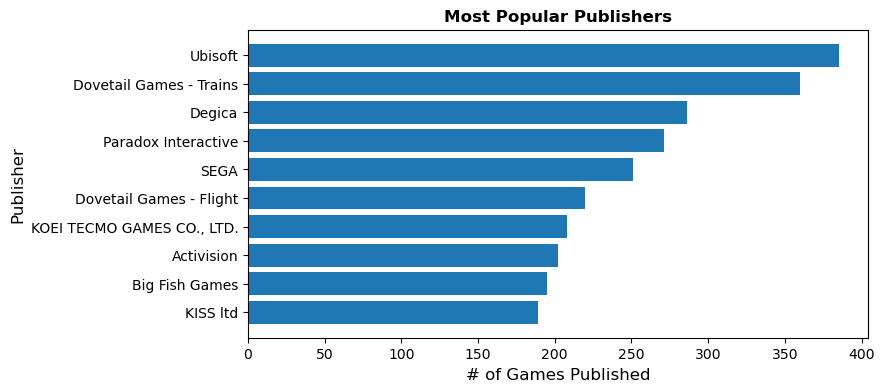

In [60]:
top10_publishers = dict(sorted(game_publishers.items(), key=lambda x: x[1], reverse=True)[:10])

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(list(top10_publishers.keys()), list(top10_publishers.values()), align='center')
ax.invert_yaxis() 
ax.set_xlabel('# of Games Published', fontsize=12)
ax.set_ylabel('Publisher', fontsize=12)
ax.set_title('Most Popular Publishers', fontsize=12, fontweight='bold')
plt.show()